Whitney Kenner
u0777962
HW4
CS6017


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ddf = pd.read_csv('timing.csv')
ddf

,testType,structType,kVal,nVal,dVal,distribution,time
0,k,bucket,5,1000,2,G,735056
1,k,bucket,10,1000,2,G,735150
2,k,bucket,25,1000,2,G,731312
3,k,bucket,50,1000,2,G,794324
4,k,bucket,100,1000,2,G,771083
...,...,...,...,...,...,...,...
113,d,kd,25,1000,3,U,65387
114,d,kd,25,1000,4,U,78192
115,d,kd,25,1000,5,U,93769
116,d,kd,25,1000,6,U,110422


[Text(0.5, 1.0, 'Effect of variable K on 3 data structs (gaussian dist)')]

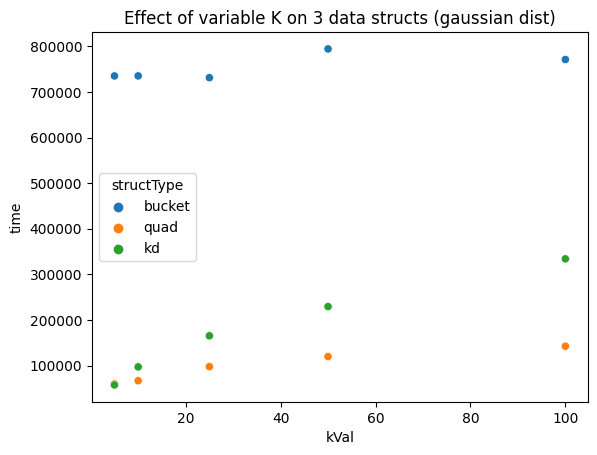

In [112]:
#begin analyzing by comparing only the impact of K on all dataStructures
k_variable_gaussian_df = ddf.loc[(ddf['testType'] == 'k') & (ddf['distribution'] == 'G')]


sns.scatterplot(y='time',x='kVal',hue='structType',data=k_variable_gaussian_df).set(title='Effect of variable K on 3 data structs (gaussian dist)')


In [113]:
import statsmodels.formula.api as sm
#compare time + kVal gaussian for each data struct (only done on gaussian distributions):
#bucket
k_variable_g_df_bucket = k_variable_gaussian_df.loc[(k_variable_gaussian_df['structType'] == 'bucket')]
k_variable_g_b_ols = sm.ols(formula="time ~ kVal", data=k_variable_g_df_bucket).fit()
k_variable_g_b_ols.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     2.679
Date:                Sun, 02 Jul 2023   Prob (F-statistic):              0.200
Time:                        12:31:15   Log-Likelihood:                -56.148
No. Observations:                   5   AIC:                             116.3
Df Residuals:                       3   BIC:                             115.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.345e+05   1.56e+04     47.084      0.000    6.85e+05    7.84e+05
kVal         496.0083    303.051      1.637      0.200    -468.434    1460.451
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.011
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.227
Skew:                           1.212   Prob(JB):                        0.541
Kurtosis:                       2.876   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#quadTree
k_variable_g_df_quad = k_variable_gaussian_df.loc[(k_variable_gaussian_df['structType'] == 'quad')]
k_variable_g_q_ols = sm.ols(formula="time ~ kVal", data=k_variable_g_df_quad).fit()
k_variable_g_q_ols.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     28.31
Date:                Sun, 02 Jul 2023   Prob (F-statistic):             0.0130
Time:                        12:31:15   Log-Likelihood:                -52.958
No. Observations:                   5   AIC:                             109.9
Df Residuals:                       3   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.502e+04   8242.414      7.888      0.004    3.88e+04    9.12e+04
kVal         851.8680    160.115      5.320      0.013     342.311    1361.425
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.581
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.821
Skew:                           0.395   Prob(JB):                        0.663
Kurtosis:                       1.180   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#KDTree
k_variable_g_df_kd = k_variable_gaussian_df.loc[(k_variable_gaussian_df['structType'] == 'kd')]
k_variable_g_k_ols = sm.ols(formula="time ~ kVal", data=k_variable_g_df_kd).fit()
k_variable_g_k_ols.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     70.66
Date:                Sun, 02 Jul 2023   Prob (F-statistic):            0.00353
Time:                        12:31:15   Log-Likelihood:                -56.564
No. Observations:                   5   AIC:                             117.1
Df Residuals:                       3   BIC:                             116.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.144e+04    1.7e+04      4.214      0.024    1.75e+04    1.25e+05
kVal        2768.1900    329.315      8.406      0.004    1720.164    3816.216
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.293
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.480
Skew:                          -0.053   Prob(JB):                        0.787
Kurtosis:                       1.485   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0.5, 1.0, 'Effect of variable K on 3 data structs (uniform dist)')]

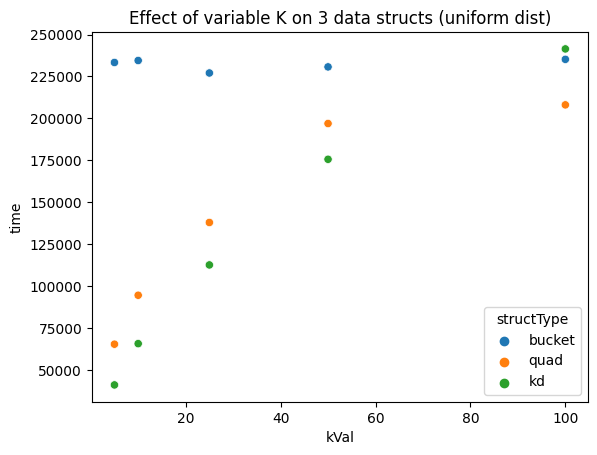

In [116]:
#now will look at the impact of variable K on uniform distribution
k_variable_uniform_df = ddf.loc[(ddf['testType'] == 'k') & (ddf['distribution'] == 'U')]


sns.scatterplot(y='time',x='kVal',hue='structType',data=k_variable_uniform_df).set(title='Effect of variable K on 3 data structs (uniform dist)')

[Text(0.5, 1.0, 'Effect of variable N on 3 data structs (gaussian dist)')]

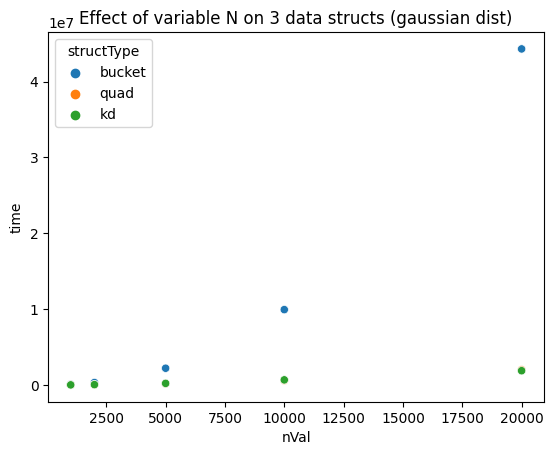

In [117]:
#impact of n on gaussian distribution
n_variable_gaussian_df = ddf.loc[(ddf['testType'] == 'n') & (ddf['distribution'] == 'G')]


sns.scatterplot(y='time',x='nVal',hue='structType',data=n_variable_gaussian_df).set(title='Effect of variable N on 3 data structs (gaussian dist)')

In [118]:
#compare time + nVal gaussian for each data struct (only done on gaussian distributions):
#bucket
n_variable_g_df_bucket = n_variable_gaussian_df.loc[(n_variable_gaussian_df['structType'] == 'bucket')]
n_variable_g_b_ols = sm.ols(formula="time ~ nVal", data=n_variable_g_df_bucket).fit()
n_variable_g_b_ols.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     41.40
Date:                Sun, 02 Jul 2023   Prob (F-statistic):            0.00761
Time:                        12:31:15   Log-Likelihood:                -83.558
No. Observations:                   5   AIC:                             171.1
Df Residuals:                       3   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.436e+06   3.75e+06     -1.717      0.185   -1.84e+07    5.49e+06
nVal        2342.6181    364.097      6.434      0.008    1183.900    3501.336
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.734
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.629
Skew:                          -0.572   Prob(JB):                        0.730
Kurtosis:                       1.692   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
#quad
n_variable_g_df_quad = n_variable_gaussian_df.loc[(n_variable_gaussian_df['structType'] == 'quad')]
n_variable_g_q_ols = sm.ols(formula="time ~ nVal", data=n_variable_g_df_quad).fit()
n_variable_g_q_ols.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     77.06
Date:                Sun, 02 Jul 2023   Prob (F-statistic):            0.00311
Time:                        12:31:15   Log-Likelihood:                -66.525
No. Observations:                   5   AIC:                             137.1
Df Residuals:                       3   BIC:                             136.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.43e+05   1.24e+05     -1.955      0.146   -6.39e+05    1.53e+05
nVal         105.9824     12.073      8.778      0.003      67.560     144.405
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.651
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.625
Skew:                          -0.472   Prob(JB):                        0.732
Kurtosis:                       1.548   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
#KDTree
n_variable_g_df_kd = n_variable_gaussian_df.loc[(n_variable_gaussian_df['structType'] == 'kd')]
n_variable_g_k_ols = sm.ols(formula="time ~ nVal", data=n_variable_g_df_kd).fit()
n_variable_g_k_ols.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):            0.00106
Time:                        12:31:15   Log-Likelihood:                -64.379
No. Observations:                   5   AIC:                             132.8
Df Residuals:                       3   BIC:                             132.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.882e+05   8.09e+04     -2.325      0.103   -4.46e+05    6.94e+04
nVal          99.4895      7.860     12.658      0.001      74.476     124.503
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.507
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.667
Skew:                          -0.311   Prob(JB):                        0.716
Kurtosis:                       1.323   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Text(0.5, 1.0, 'Effect of variable N on 3 data structs (uniform dist)')]

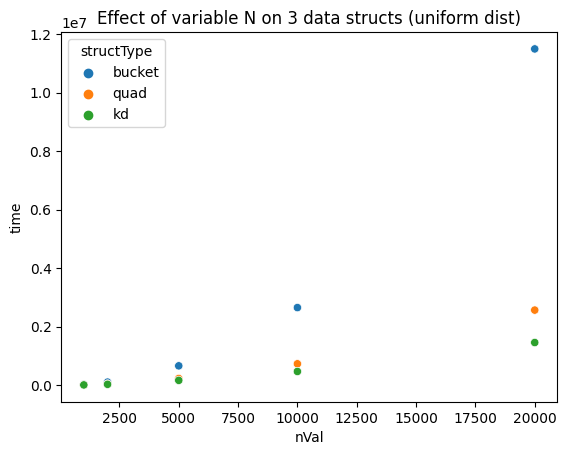

In [121]:
#impact of n on uniform distribution
n_variable_uniform_df = ddf.loc[(ddf['testType'] == 'n') & (ddf['distribution'] == 'U')]


sns.scatterplot(y='time',x='nVal',hue='structType',data=n_variable_uniform_df).set(title='Effect of variable N on 3 data structs (uniform dist)')

[Text(0.5, 1.0, 'Effect of variable D on 2 data structs (gaussian dist)')]

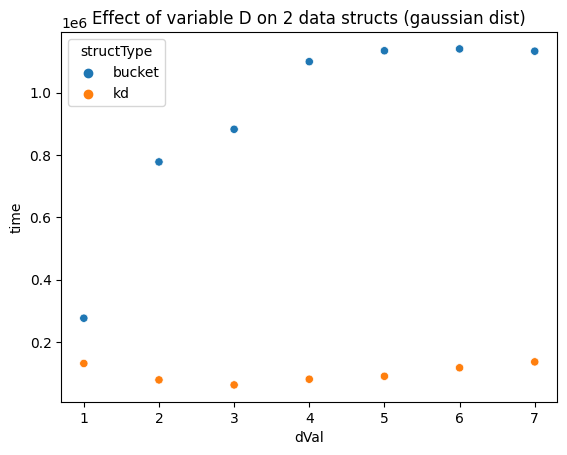

In [122]:
#impact of d on gaussian distribution
d_variable_gaussian_df = ddf.loc[(ddf['testType'] == 'd') & (ddf['distribution'] == 'G')]


sns.scatterplot(y='time',x='dVal',hue='structType',data=d_variable_gaussian_df).set(title='Effect of variable D on 2 data structs (gaussian dist)')

In [123]:
#compare time + dVal gaussian for each data struct (only done on gaussian distributions):
#bucket
d_variable_g_df_bucket = d_variable_gaussian_df.loc[(d_variable_gaussian_df['structType'] == 'bucket')]
d_variable_g_b_ols = sm.ols(formula="time ~ dVal", data=d_variable_g_df_bucket).fit()
d_variable_g_b_ols.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.16
Date:                Sun, 02 Jul 2023   Prob (F-statistic):             0.0131
Time:                        12:31:15   Log-Likelihood:                -93.392
No. Observations:                   7   AIC:                             190.8
Df Residuals:                       5   BIC:                             190.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.134e+05   1.51e+05      2.744      0.041    2.62e+04    8.01e+05
dVal        1.268e+05   3.37e+04      3.763      0.013    4.02e+04    2.13e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.197
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.776
Skew:                          -0.617   Prob(JB):                        0.678
Kurtosis:                       1.933   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
#kdtree
d_variable_g_df_kd = d_variable_gaussian_df.loc[(d_variable_gaussian_df['structType'] == 'bucket')]
d_variable_g_k_ols = sm.ols(formula="time ~ dVal", data=d_variable_g_df_kd).fit()
d_variable_g_k_ols.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.16
Date:                Sun, 02 Jul 2023   Prob (F-statistic):             0.0131
Time:                        12:31:15   Log-Likelihood:                -93.392
No. Observations:                   7   AIC:                             190.8
Df Residuals:                       5   BIC:                             190.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.134e+05   1.51e+05      2.744      0.041    2.62e+04    8.01e+05
dVal        1.268e+05   3.37e+04      3.763      0.013    4.02e+04    2.13e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.197
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.776
Skew:                          -0.617   Prob(JB):                        0.678
Kurtosis:                       1.933   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0.5, 1.0, 'Effect of variable D on 2 data structs (uniform dist)')]

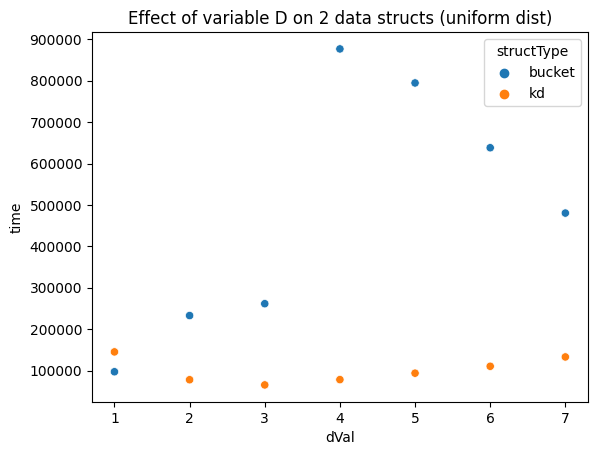

In [125]:
#impact of d on uniform distribution
d_variable_uniform_df = ddf.loc[(ddf['testType'] == 'd') & (ddf['distribution'] == 'U')]


sns.scatterplot(y='time',x='dVal',hue='structType',data=d_variable_uniform_df).set(title='Effect of variable D on 2 data structs (uniform dist)')

[Text(0.5, 1.0, 'Effect of variables K & N on 3 data structs (gaussian dist)')]

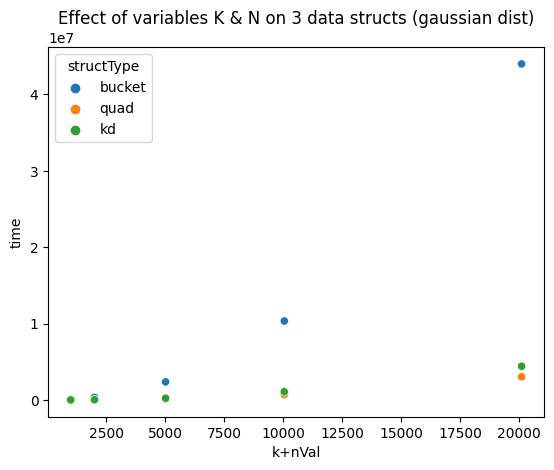

In [126]:
#impact of k + n on gaussian distribution
kn_variable_gaussian_df = ddf[(ddf['testType'] == 'kn') & (ddf['distribution'] == 'G')]
kn_variable_g_df = pd.DataFrame(kn_variable_gaussian_df)
kn_variable_g_df['k+nVal'] = kn_variable_g_df['nVal']+kn_variable_g_df['kVal']
sns.scatterplot(y='time',x='k+nVal',hue='structType',data=kn_variable_g_df).set(title='Effect of variables K & N on 3 data structs (gaussian dist)')

[Text(0.5, 1.0, 'Effect of variables K & N on 3 data structs (uniform dist)')]

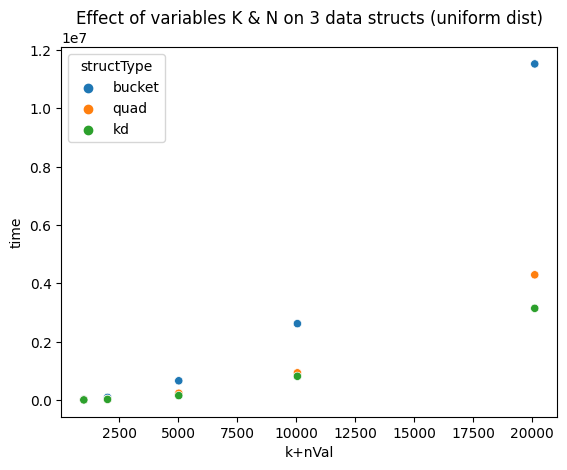

In [127]:
#impact of k + n on uniform distribution
kn_variable_uniform_df = ddf[(ddf['testType'] == 'kn') & (ddf['distribution'] == 'U')]
kn_variable_u_df = pd.DataFrame(kn_variable_uniform_df)
kn_variable_u_df['k+nVal'] = kn_variable_u_df['nVal']+kn_variable_u_df['kVal']
sns.scatterplot(y='time',x='k+nVal',hue='structType',data=kn_variable_u_df).set(title='Effect of variables K & N on 3 data structs (uniform dist)')

ANALYSIS

Analyze the data you collected.

Plot parts of your data to make sense of it (what impact does K, N, D, and the data structure have?)
The data structure itself appears to be correlated with the overall time it takes! Overall, KDTree seems to be the most time efficient, which makes sense, but as k + n increase on a gaussian distribution, kdtree seems to perform slightly worse. I'm assuming this is due to an inefficiency in my implementation as it should still perform better. The timing for KDTree is relatively unaffected by increasing dimesions which makes sense due to it splitting each level by dimension, bucketing does NOT handle increasing dimensionality well.  bucketing is extremely slow, particularly as N or K + N increases. No matter the number of neighbors (K), the bucketing structure seems to perform terribly, which makes sense since bucket knn query still has to iterate through all of the points within the given bucket. 

Perform regression based on the performance we expect to see. Do tests confirm or disprove our expectations? What run times do you expect to see based on simple big-O analysis?
Are there any aspects of your data that seem unusual? Can you explain them?

Bucket knn overall met my expectations except for on the effects of dimensionality on a uniform distribution, for some reason the timing goes up from 1-4 dimensions and then begins to drop at 5 dimensions. this isn't seen in the gaussian distribution. I repeated the timing numerous times and each time it returned similar values. My best guess is having them uniformly distributed made the buckets more even which slightly reduced the search time, but I don't see how the dimensionality would affect it so greatly. the time complexity of bucket sorting can be as good as O(m log m) with an efficient sorting algorithm, but ours does not appear particularly efficient hence the terrible timing. I was a little surprised that the quad tree performed better than the kd tree in one instance: k + n increasing on a gaussian distribution (as k + n get large). kd tree should have a search big O of (log n) and quad tree should have a search big O of (log n + k), so the quad tree should be less efficient. I wonder if this just happens to be due to the split points for both of the different data structures? re-running various times returns the same result. it could also be due to an inefficency in my implementation somewhere


This is pretty open ended. The goal is to use simple visualization and regression to make sense of the timing data that you collect.